In [665]:
# Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Libreria para métricas
import scipy 
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

In [666]:
# Levanto el dataset
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [667]:
# Preprocesamiento 
features = ['GrLivArea','GarageArea','LotFrontage','MasVnrArea','GarageCars','TotRmsAbvGrd','OverallQual']

In [668]:
# Evaluo vacios
df[features].isnull().sum()

GrLivArea         0
GarageArea        0
LotFrontage     259
MasVnrArea        8
GarageCars        0
TotRmsAbvGrd      0
OverallQual       0
dtype: int64

In [669]:
# A los efectos del análisis, voy a eliminar registros vacíos. 
# Ustedes intenten imputarlos con alguna técnica copada ;)
df_limpia = df.dropna(subset= features)

In [670]:
# ¿Cuántos registros quedan?
df_limpia.shape

(1195, 81)

In [671]:
#Separamos en train y test
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df_limpia,
                                    test_size = 0.2, #Porcentaje de muestra test 
                                    random_state = 43) #Semilla
df_train = df_train.reset_index()
df_test = df_test.reset_index()

In [672]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler
X_train = df_train[features].values
X_test = df_test[features].values
# Defino escalador
sc = StandardScaler()
# Genero parámetros con train
X_train = sc.fit_transform(X_train)
# Le aplico el escalador a test
X_test = sc.transform(X_test)

# PCA

In [673]:
# Aplicacion de PCA
from sklearn.decomposition import PCA
# Inicio el objeto PCA
pca = PCA()
# Genero componentes con TRAIN
PCA_train = pca.fit_transform(X_train)
# Aplico a test
PCA_test = pca.transform(X_test)

# Almaceno en dataframe y presento
# Train
PCA_train = pd.DataFrame(data = PCA_train)
prefijo = "PC_"
PCA_train = PCA_train.add_prefix(prefijo)
# Test
PCA_test = pd.DataFrame(data = PCA_test)
prefijo = "PC_"
PCA_test = PCA_test.add_prefix(prefijo)
# ¿Qué generé?
PCA_train.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6
0,-0.620108,-0.431719,0.600758,-0.228656,0.558698,0.013783,-0.142518
1,4.826445,0.468078,-0.629915,-0.863587,0.989757,0.186615,0.768681
2,-1.180010,-1.016830,0.427596,-0.115419,0.408314,0.029377,-0.205983
3,-0.683344,-1.166888,-0.585968,-0.579385,-0.693429,0.063594,-0.268188
4,1.098331,0.193341,-0.599196,-0.194047,0.026754,-0.347672,0.190500


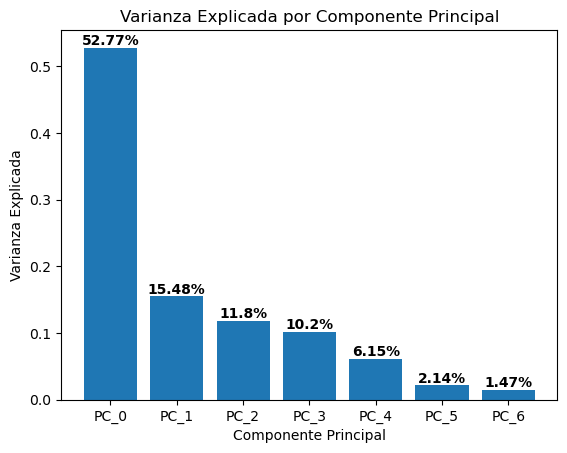

In [674]:
# Análisis de la varianza explicada para cada componente
varianza_explicada = pca.explained_variance_ratio_
componentes = PCA_train.columns

plt.bar(componentes, 
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(y_text * 100,2))}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

**Insights**:

El primer componente principal es responsable de la varianza del 52,77%. De manera similar, el segundo componente principal causa una variación del 15,48% en el conjunto de datos. En conjunto, podemos decir que el 68,25% de la información del conjunto de características es capturada por los dos primeros componentes principales.

# Kernel PCA
Kernel PCA (Análisis de Componentes Principales con Kernel) es una extensión del PCA tradicional que utiliza funciones kernel para transformar los datos originales en un espacio de características de mayor dimensión antes de realizar el PCA. Esto es útil cuando los datos no son linealmente separables en el espacio original.

## Algunos Hiperparámetros: 
* **n_components:** El número de componentes principales a retener.
* **kernel:** Puede ser 'linear' para un kernel lineal, 'poly' para un kernel polinómico, 'rbf' para un kernel de base radial (RBF), 'sigmoid' para un kernel sigmoidal, o incluso un kernel personalizado.
* **gamma:** Este parámetro afecta la forma del kernel RBF y es específico para ese kernel. Valores más altos de gamma darán como resultado una transformación más compleja.
* **degree:** Si estás utilizando un kernel polinómico ('poly'), este parámetro controla el grado del polinomio.

In [675]:
from sklearn.decomposition import KernelPCA
# Inicio el objeto KPCA
Kpca = KernelPCA(n_components = 4, 
                 kernel = 'sigmoid', 
                 gamma = 0.2)
# Genero componentes con TRAIN
KPCA_train = Kpca.fit_transform(X_train)
# Aplico a test
KPCA_test = Kpca.transform(X_test)

# Almaceno en dataframe y presento
# Train
KPCA_train = pd.DataFrame(data = KPCA_train)
prefijo = "KPC_"
KPCA_train = KPCA_train.add_prefix(prefijo)
# Test
KPCA_test = pd.DataFrame(data = KPCA_test)
prefijo = "PC_"
KPCA_test = KPCA_test.add_prefix(prefijo)
# ¿Qué generé?
KPCA_test.head()

,PC_0,PC_1,PC_2,PC_3
0,0.104201,0.234627,-0.041433,-0.154103
1,0.153624,0.100300,-0.136543,-0.086211
2,-0.638399,-0.012436,-0.169087,0.009907
3,0.934691,-0.326150,0.280116,0.075531
4,-0.539707,0.125060,0.133739,-0.064061


# Análisis Factorial 
## Hiperparámetros:
* **n_factors (Número de Factores):**

    Número de factores que se extraerán durante el análisis factorial. Los factores son dimensiones latentes que representan patrones subyacentes en los datos observados. "Dimensión latente" se refiere a una variable no observada directamente pero que se asume que subyace en las relaciones entre variables observadas. Estas dimensiones latentes son conceptos abstractos que se utilizan para explicar patrones complejos en los datos.

* **is_corr_matrix (Es una Matriz de Correlación):**

    Este parámetro indica si los datos de entrada se proporcionan como una matriz de correlación o como una matriz de covarianza. En análisis factorial, puedes trabajar con la matriz de correlación si estás más interesado en las relaciones proporcionales entre variables en lugar de sus covarianzas absolutas.


## Elección n_factor óptimo: Scree Plot
 Esta visualización muestra la varianza explicada por cada factor en función del número de factores. Observa el punto en el que la ganancia marginal en varianza explicada disminuye significativamente. El codo en la gráfica (donde la pendiente cambia) suele indicar la cantidad óptima de factores.

* **¿Qué son los valores propios (eigenvalores)?**
    Indican cuánta varianza total de los datos es explicada por cada uno de estos factores. Observar el Scree Plot te permite identificar el punto en el que la disminución en los eigenvalores se estabiliza, indicando la cantidad óptima de factores a retener. Este punto es conocido como el "codo" en la gráfica.

    Para interpretar los eigenvalores en el Scree Plot:

    1. Eigenvalores grandes sugieren que el factor asociado explica una cantidad significativa de varianza en los datos.
    2. Eigenvalores pequeños indican que el factor explica una cantidad mínima de varianza y puede ser menos relevante para retener.

    En general, se suelen retener factores asociados con eigenvalores superiores a 1, pero la elección del umbral puede depender del contexto específico y de las características de tus datos. La interpretación de los eigenvalores también debe considerarse junto con otros métodos de selección de factores y criterios.

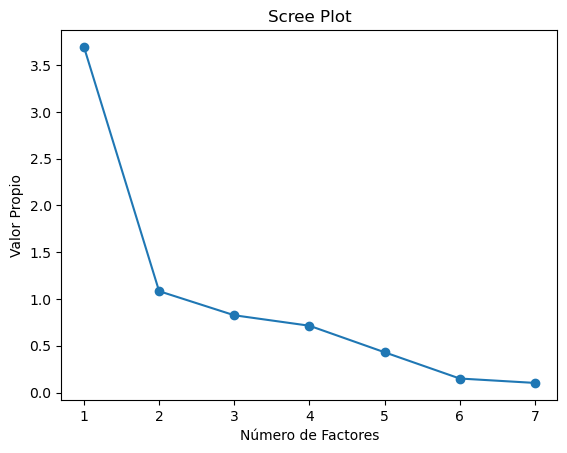

In [676]:
# !pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
# Inicializar el analizador factorial con un número máximo de factores (puedes ajustar según sea necesario)
max_factors = len(features) - 1  
fa = FactorAnalyzer(n_factors = max_factors, 
                    rotation = None)

# Ajustar el modelo al conjunto de datos
fa.fit(X_train)

# Obtener los valores propios (eigenvalues)
eigenvalues, _ = fa.get_eigenvalues()

# Crear el Scree Plot
plt.plot(np.arange(1, len(features) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Número de Factores')
plt.ylabel('Valor Propio')
plt.show()

In [677]:
# Genero mi modelo 
n_factores = 4
fa = FactorAnalyzer(n_factors = n_factores, 
                    is_corr_matrix = False)
fa.fit(X_train)

FactorAnalyzer(n_factors=4, rotation_kwargs={})

## Carga de los factores: 
Las "cargas de los factores" en el contexto del análisis factorial son los coeficientes que indican la fuerza y la dirección de la relación entre cada variable observada y los factores latentes extraídos por el modelo. Estas cargas factoriales describen cómo cada variable contribuye a los factores subyacentes.
* Una carga positiva significa que a medida que el factor aumenta, la variable también tiende a aumentar, mientras que una carga negativa indica una relación inversa. 
* La magnitud de la carga refleja la fuerza de la relación.

Matemáticamente, la relación entre una variable observada i y un factor j se puede expresar mediante la siguiente fórmula:

X(i) = λ(ij) * F(j) + ε(i)

Donde: 
- X(i): variable observada i
- λ(ij): carga del factor para la variable i en el factor j
- F(j): factor j
- ε(i): error único asociado a la variable i

Se puede conceptualizar al análisis factorial como una especie de regresión múltiple. Es decir, se puede pensar en las cargas factoriales como los coeficientes de pendiente en una regresión, representando cómo cada variable observada se relaciona con los factores latentes. Las cargas factoriales indican la contribución relativa de cada variable observada a los factores comunes.

Es importante tener en cuenta que, a diferencia de la regresión múltiple, el análisis factorial no se utiliza para predecir una variable dependiente específica, sino más bien para entender la estructura subyacente de las relaciones entre variables observadas y factores latentes: 

**Regresión Múltiple:**

En una regresión múltiple, tienes una variable dependiente (la que estás tratando de predecir) y múltiples variables independientes (predictores). La regresión modela la relación lineal entre la variable dependiente y los predictores, y los coeficientes de regresión representan la fuerza y dirección de esas relaciones.

**Análisis Factorial:**

En el análisis factorial, también tienes variables observadas (las que mides) y factores latentes (constructos no observados). El análisis factorial modela la relación lineal entre las variables observadas y los factores latentes. Las cargas factoriales en el análisis factorial son análogas a los coeficientes de regresión en una regresión múltiple: indican la fuerza y dirección de la relación entre una variable observada y un factor latente.


In [678]:
# Obtenemos las cargas
cargas_factoriales = pd.DataFrame({'Features': features})
cargas_factoriales_values = pd.DataFrame(fa.loadings_)
prefijo = "CargaFactorial_"
cargas_factoriales_values = cargas_factoriales_values.add_prefix(prefijo)
cargas_factoriales = pd.concat([cargas_factoriales,cargas_factoriales_values],axis = 1)
print("Cargas de los factores:")
cargas_factoriales

Cargas de los factores:


,Features,CargaFactorial_0,CargaFactorial_1,CargaFactorial_2,CargaFactorial_3
0,GrLivArea,-0.090697,0.606377,0.364341,0.131644
1,GarageArea,0.829116,-0.080598,0.041762,0.204676
2,LotFrontage,0.021441,0.029766,-0.020202,0.530036
3,MasVnrArea,-0.007171,-0.029975,0.513148,0.061968
4,GarageCars,0.957567,0.088704,0.043930,-0.115380
5,TotRmsAbvGrd,0.056492,1.023703,-0.128846,-0.023038
6,OverallQual,0.140030,0.016672,0.783891,-0.131118


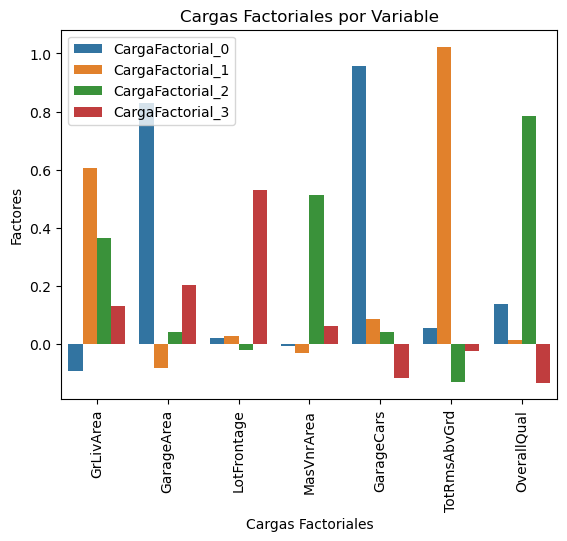

In [679]:
# Visualmente
cargas_factoriales_long = cargas_factoriales.melt(id_vars='Features', 
                                                  var_name='Factor', 
                                                  value_name='CargaFactorial')

sns.barplot(data = cargas_factoriales_long,
                x = 'Features',
                y = 'CargaFactorial',
                hue = 'Factor')

plt.title('Cargas Factoriales por Variable')
plt.xlabel('Cargas Factoriales')
plt.ylabel('Factores')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [680]:
# Generamos dataframes con las puntuaciones de factores
# representan la contribución de cada observación (fila) en el conjunto de datos a los factores latentes. 
AF_train = pd.DataFrame(fa.transform(X_train))
prefijo = "AF_"
AF_train = AF_train.add_prefix(prefijo)
AF_test = pd.DataFrame(fa.transform(X_test))
AF_test = AF_test.add_prefix(prefijo)
AF_train.head()

,AF_0,AF_1,AF_2,AF_3
0,0.225576,-0.385490,-0.483358,-0.167583
1,1.926755,2.595813,2.015267,2.459375
2,0.203041,-0.945806,-0.646516,-0.571012
3,0.135262,-0.790204,0.075277,-0.859939
4,0.300100,0.703843,0.434786,0.252430


**Insights**:

* **Cantidad de Factores:** Se generaron 4 factores y se evaluó la contribución de cada variable en cada factor. Los factores son dimensiones latentes que explican la variabilidad conjunta observada en las variables originales. Cada factor está asociado con una combinación lineal de las variables observadas. 

* **Factor 0:** Las variables GarageArea y GarageCars tienen una carga positiva bastante fuerte en el Factor 0. Esto podría indicar que un tamaño de garaje más grande está asociado con puntuaciones más altas en el Factor 0.

* **Factor 1:** Las variables GrLivArea y TotRmsAbvGrd tienen una carga positiva bastante fuerte en el Factor 1. Esto podría indicar que un tamaño de GrLivArea o TotRmsAbvGrd más grande está asociado con puntuaciones más altas en el Factor 1.

* **Factor 2:** Las variables OverallQual y MasVnrArea tienen una carga positiva bastante fuerte en el Factor 2. Esto podría indicar que un puntaje más alto de OverallQual, o un área mayor de MasVnrArea está asociado con puntuaciones más altas en el Factor 2.

* **Factor 3:** La variable LotFrontage tiene una carga positiva bastante fuerte en el Factor 3. Esto podría indicar que a mayor LotFrontage, mayores puntuaciones en el Factor 3.



# Evaluemos los nuevos features generados

In [681]:
# Normalicemos el target 
y_train = df_train['SalePrice']
y_test = df_test['SalePrice']
# Calculo media y desvio
media = y_train.mean()
desvio = np.std(y_train, ddof = 0)
# Genero parámetros con train
df_train['SalePrice_Scaled'] = (df_train['SalePrice'] - media) / desvio
df_test['SalePrice_Scaled'] = (df_test['SalePrice'] - media) / desvio


In [682]:
# Features escaladas
df_train_scaled = pd.DataFrame(data = X_train)
prefijo = "Scaled_"
df_train_scaled.columns = features
df_train_scaled.add_prefix(prefijo)
df_train_scaled = df_train_scaled.add_prefix(prefijo)
df_test_scaled = pd.DataFrame(data = X_test)
prefijo = "Scaled_"
df_test_scaled.columns = features
df_test_scaled = df_test_scaled.add_prefix(prefijo)


In [683]:
# Uno todo a los dataframes originales
df_train = pd.concat([df_train,df_train_scaled,PCA_train,KPCA_train,AF_train],axis = 1)
df_test = pd.concat([df_test,df_test_scaled,PCA_test,KPCA_test,AF_test],axis = 1)

Text(0.5, 1.0, 'Relación entre Precio de Venta y Área Habitable')

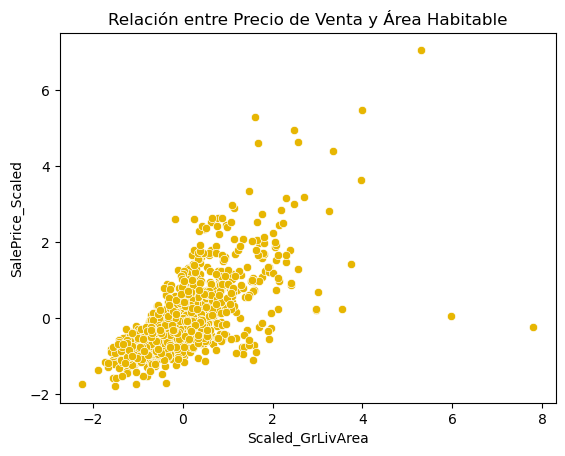

In [684]:
# Evaluando relaciones originales
sns.scatterplot(data = df_train,
                x = 'Scaled_GrLivArea',
                y = 'SalePrice_Scaled',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Área Habitable')

Text(0.5, 1.0, 'Relación entre Precio de Venta y Scaled_LotFrontage')

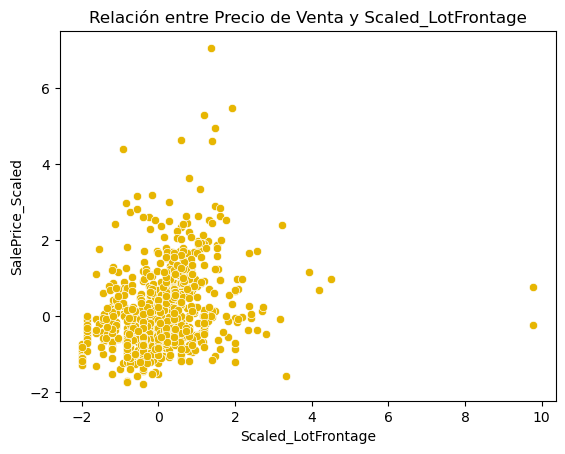

In [685]:
# Evaluando relaciones originales
sns.scatterplot(data = df_train,
                x = 'Scaled_LotFrontage',
                y = 'SalePrice_Scaled',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Scaled_LotFrontage')

# ¿Cómo fueron las relaciones con PCA? 

Text(0.5, 1.0, 'Relación entre componentes y variable target')

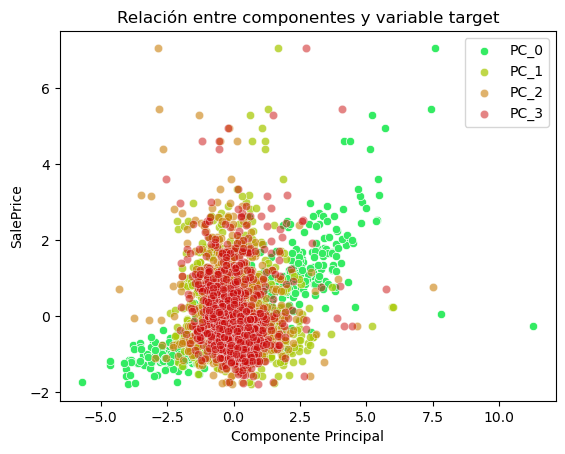

In [686]:
# PCA
plt.figure()
sns.scatterplot(data = df_train,
                x = 'PC_0',
                y = 'SalePrice_Scaled',
               label='PC_0', 
               color = '#34EB63',
                alpha = 1)
sns.scatterplot(data = df_train, 
                x = 'PC_1', 
                y = 'SalePrice_Scaled', 
                label = 'PC_1', 
                color = '#AACA0B',
                alpha = 0.75)
sns.scatterplot(data = df_train, 
                x = 'PC_2', 
                y = 'SalePrice_Scaled', 
                label = 'PC_2', 
                color = '#CA7F0B',
                alpha = 0.6)
sns.scatterplot(data = df_train, 
                x = 'PC_3', 
                y = 'SalePrice_Scaled', 
                label = 'PC_3', 
                color = '#CA0B0B',
                alpha = 0.5)
plt.xlabel('Componente Principal')
plt.ylabel('SalePrice')
plt.title('Relación entre componentes y variable target')

Text(0.5, 1.0, 'Relación entre componentes y variable target')

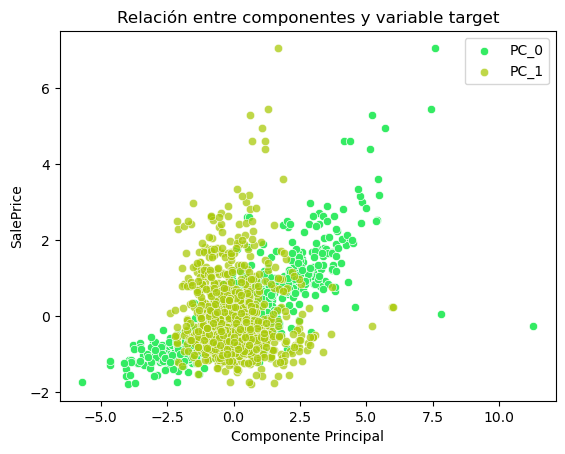

In [687]:
# Sólo primeros dos componentes 
plt.figure()
sns.scatterplot(data = df_train,
                x = 'PC_0',
                y = 'SalePrice_Scaled',
               label='PC_0', 
               color = '#34EB63',
                alpha = 1)
sns.scatterplot(data = df_train, 
                x = 'PC_1', 
                y = 'SalePrice_Scaled', 
                label = 'PC_1', 
                color = '#AACA0B',
                alpha = 0.75)
plt.xlabel('Componente Principal')
plt.ylabel('SalePrice')
plt.title('Relación entre componentes y variable target')

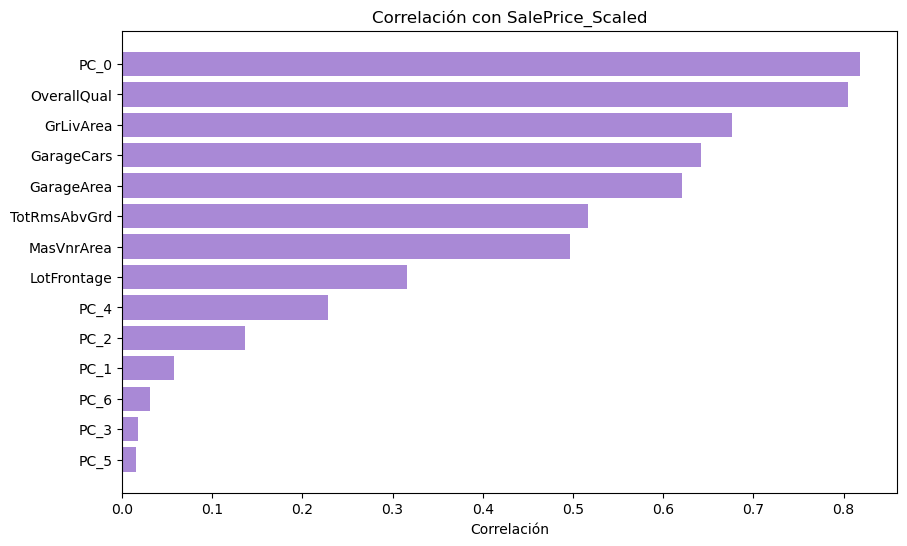

In [688]:
# Correlación con el target 
variables_PCA = ['PC_0','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','SalePrice_Scaled']
variables_final = features + variables_PCA
# Calculo matriz de correlación 
matriz_correlacion = df_train[variables_final].corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['SalePrice_Scaled']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['SalePrice_Scaled']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con SalePrice_Scaled')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

# ¿Cómo fueron las relaciones con Kernel PCA?

Text(0.5, 1.0, 'Relación entre componentes Kernel y variable target')

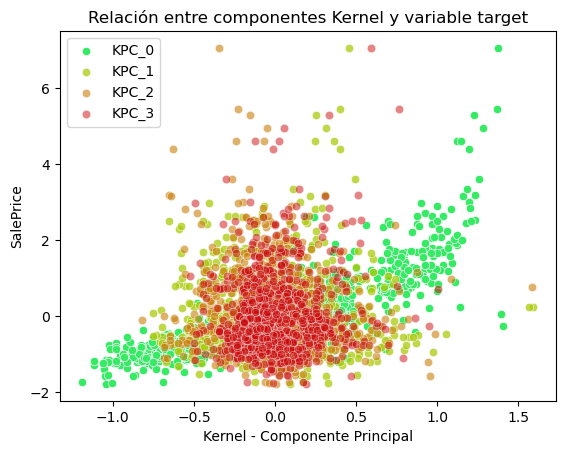

In [689]:
# PCA
plt.figure()
sns.scatterplot(data = df_train,
                x = 'KPC_0',
                y = 'SalePrice_Scaled',
               label='KPC_0', 
               color = '#34EB63',
                alpha = 1)
sns.scatterplot(data = df_train, 
                x = 'KPC_1', 
                y = 'SalePrice_Scaled', 
                label = 'KPC_1', 
                color = '#AACA0B',
                alpha = 0.75)
sns.scatterplot(data = df_train, 
                x = 'KPC_2', 
                y = 'SalePrice_Scaled', 
                label = 'KPC_2', 
                color = '#CA7F0B',
                alpha = 0.6)
sns.scatterplot(data = df_train, 
                x = 'KPC_3', 
                y = 'SalePrice_Scaled', 
                label = 'KPC_3', 
                color = '#CA0B0B',
                alpha = 0.5)
plt.xlabel('Kernel - Componente Principal')
plt.ylabel('SalePrice')
plt.title('Relación entre componentes Kernel y variable target')

Text(0.5, 1.0, 'Relación entre componentes Kernel y variable target')

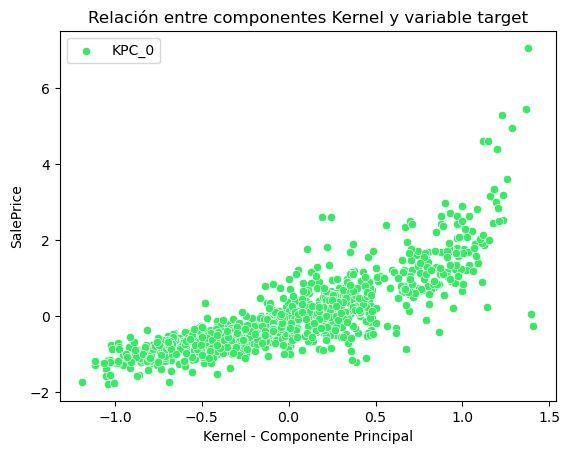

In [690]:
# Sólo primeros dos componentes 
plt.figure()
sns.scatterplot(data = df_train,
                x = 'KPC_0',
                y = 'SalePrice_Scaled',
               label='KPC_0', 
               color = '#34EB63',
                alpha = 1)
plt.xlabel('Kernel - Componente Principal')
plt.ylabel('SalePrice')
plt.title('Relación entre componentes Kernel y variable target')

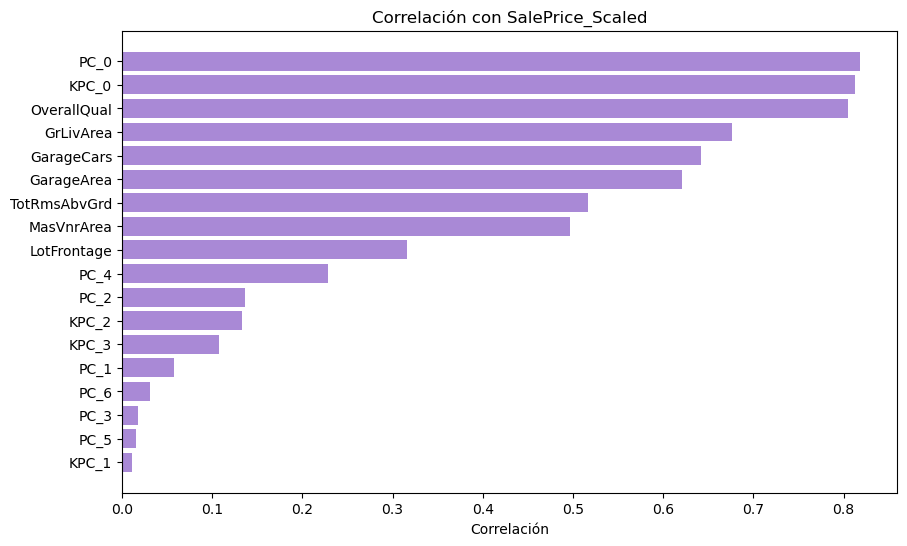

In [691]:
# Correlación con el target 
variables_PCA = ['KPC_0','KPC_1','KPC_2','KPC_3','PC_0','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','SalePrice_Scaled']
variables_final = features + variables_PCA
# Calculo matriz de correlación 
matriz_correlacion = df_train[variables_final].corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['SalePrice_Scaled']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['SalePrice_Scaled']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con SalePrice_Scaled')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

Text(0.5, 1.0, 'Relación entre Componentes')

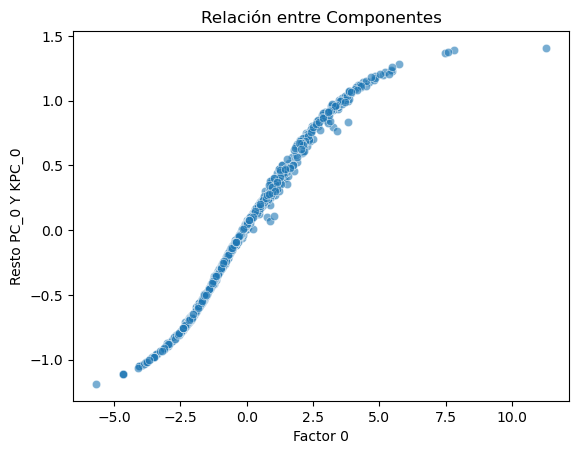

In [692]:
#Relación entre PC_0 y KPC_0
plt.figure()
sns.scatterplot(data = df_train,
                x = 'PC_0',
                y = 'KPC_0',
                alpha = 0.6)
plt.xlabel('Factor 0')
plt.ylabel('Resto PC_0 Y KPC_0')
plt.title('Relación entre Componentes')

# ¿Cómo fueron las relaciones con Análisis Factorial?

Text(0.5, 1.0, 'Relación entre Factores y variable target')

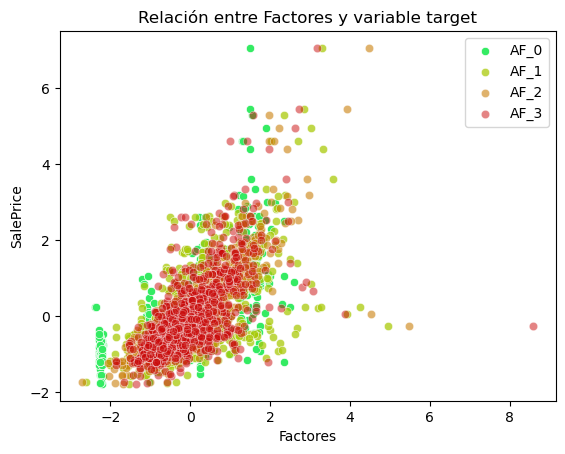

In [693]:
# Factores
plt.figure()
sns.scatterplot(data = df_train,
                x = 'AF_0',
                y = 'SalePrice_Scaled',
               label='AF_0', 
               color = '#34EB63',
                alpha = 1)
sns.scatterplot(data = df_train, 
                x = 'AF_1', 
                y = 'SalePrice_Scaled', 
                label = 'AF_1', 
                color = '#AACA0B',
                alpha = 0.75)
sns.scatterplot(data = df_train, 
                x = 'AF_2', 
                y = 'SalePrice_Scaled', 
                label = 'AF_2', 
                color = '#CA7F0B',
                alpha = 0.6)
sns.scatterplot(data = df_train, 
                x = 'AF_3', 
                y = 'SalePrice_Scaled', 
                label = 'AF_3', 
                color = '#CA0B0B',
                alpha = 0.5)
plt.xlabel('Factores')
plt.ylabel('SalePrice')
plt.title('Relación entre Factores y variable target')

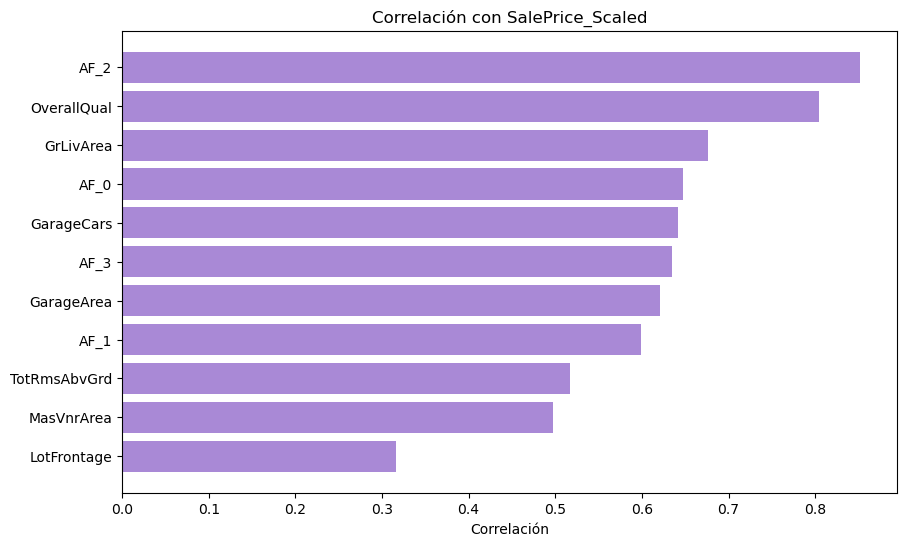

In [694]:
# Correlación con el target 
variables_AF = ['AF_0','AF_1','AF_2','AF_3','SalePrice_Scaled']
variables_final = features + variables_AF
# Calculo matriz de correlación 
matriz_correlacion = df_train[variables_final].corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['SalePrice_Scaled']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['SalePrice_Scaled']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con SalePrice_Scaled')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

Text(0.5, 1.0, 'Relación entre Factores')

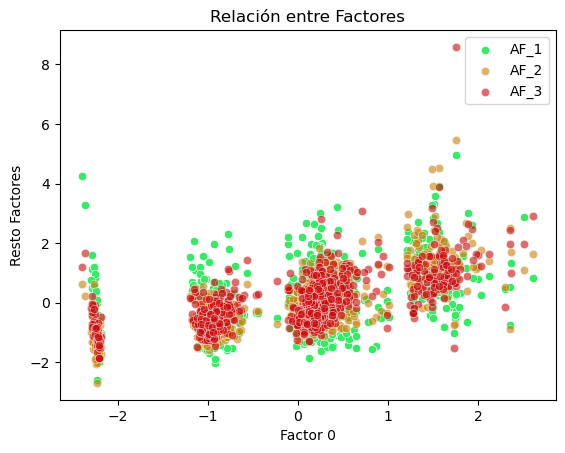

In [695]:
#Relación entre factores 
plt.figure()
sns.scatterplot(data = df_train,
                x = 'AF_0',
                y = 'AF_1',
                label = 'AF_1', 
               color = '#34EB63',
                alpha = 1)
sns.scatterplot(data = df_train, 
                x = 'AF_0', 
                y = 'AF_2', 
                label = 'AF_2', 
                color = '#CA7F0B',
                alpha = 0.6)
sns.scatterplot(data = df_train, 
                x = 'AF_0', 
                y = 'AF_3', 
                label = 'AF_3', 
                color = '#CA0B0B',
                alpha = 0.6)
plt.xlabel('Factor 0')
plt.ylabel('Resto Factores')
plt.title('Relación entre Factores')

# Y si hacemos clusters con los factores? 

In [696]:
from sklearn.cluster import KMeans
# K Means
variables_factores = ['AF_0','AF_1','AF_2','AF_3']
X = df_train[variables_factores].values
X_test = df_test[variables_factores].values
kmeans = KMeans(n_clusters = 4, 
                init = 'k-means++', 
                random_state = 42,
                max_iter = 50,
                tol = 0.05,
                n_init = 100) 
y_kmeans = kmeans.fit_predict(X)
y_kmeans_test = kmeans.predict(X_test)
df_train['Cluster_Factores'] = y_kmeans
df_test['Cluster_Factores'] = y_kmeans_test

Text(0.5, 1.0, 'Relación entre Factores')

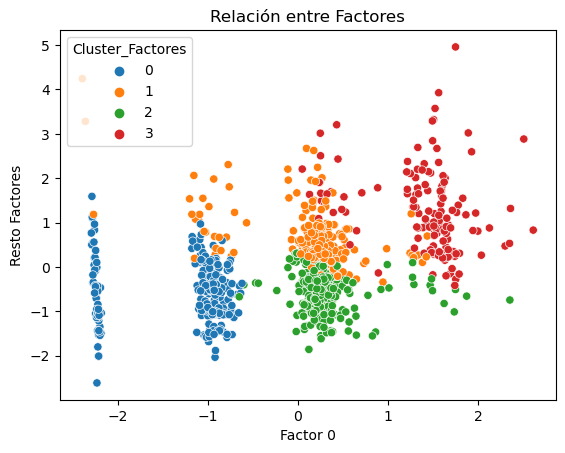

In [697]:
#Relación entre factores
df_train['Cluster_Factores'] = df_train['Cluster_Factores'].astype('category') 
plt.figure()
sns.scatterplot(data = df_train,
                x = 'AF_0',
                y = 'AF_1',
                hue = 'Cluster_Factores',
                alpha = 1)
plt.xlabel('Factor 0')
plt.ylabel('Resto Factores')
plt.title('Relación entre Factores')

Text(0.5, 1.0, 'Relación entre Precio de Venta y Cluster - TEST')

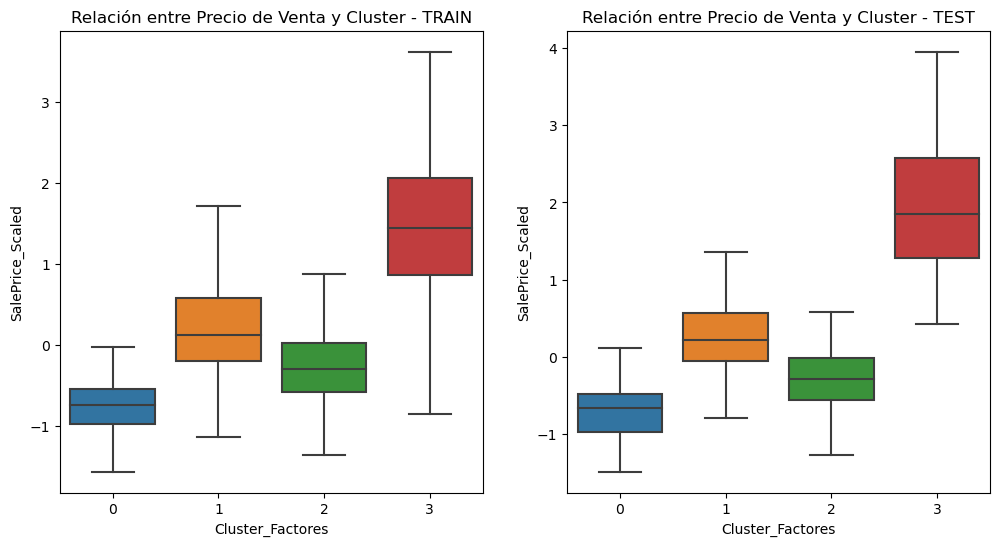

In [698]:
# Relación con el target
# Valen la pena los grupos frente al target? 
# Boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data = df_train,
            x = 'Cluster_Factores',
            y = 'SalePrice_Scaled', 
            showfliers = False)
plt.title('Relación entre Precio de Venta y Cluster - TRAIN')
plt.subplot(1, 2, 2)
sns.boxplot(data = df_test,
            x = 'Cluster_Factores',
            y = 'SalePrice_Scaled', 
            showfliers = False)
plt.title('Relación entre Precio de Venta y Cluster - TEST')

In [699]:
# Y con DBSCAN? 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5, 
                min_samples = 6)

y_dbscan = dbscan.fit_predict(X)
df_train['Cluster_DBSCAN'] = y_dbscan

y_dbscan_test = dbscan.fit_predict(X_test)
df_test['Cluster_DBSCAN'] = y_dbscan_test

Text(0.5, 1.0, 'Relación entre Factores')

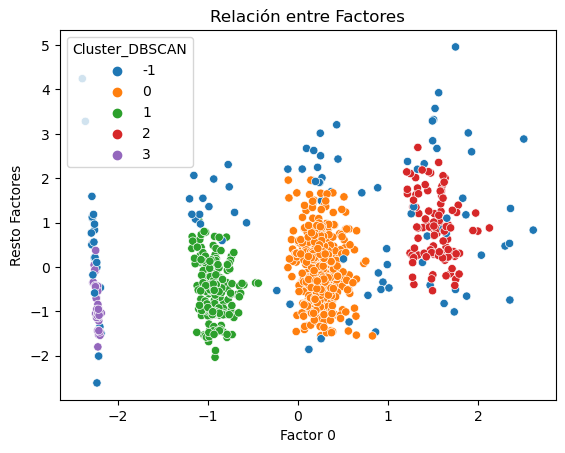

In [700]:
df_train['Cluster_DBSCAN'] = df_train['Cluster_DBSCAN'].astype('category') 
plt.figure()
sns.scatterplot(data = df_train,
                x = 'AF_0',
                y = 'AF_1',
                hue = 'Cluster_DBSCAN',
                alpha = 1)
plt.xlabel('Factor 0')
plt.ylabel('Resto Factores')
plt.title('Relación entre Factores')

Text(0.5, 1.0, 'Relación entre Precio de Venta y Cluster - TEST')

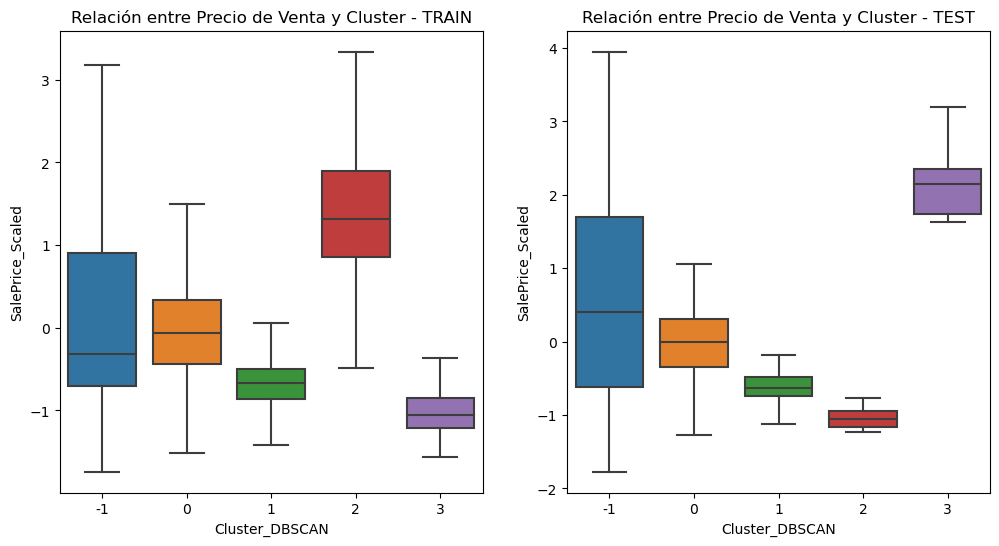

In [701]:
# Relación con el target
# Valen la pena los grupos frente al target? 
# Boxplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data = df_train,
            x = 'Cluster_DBSCAN',
            y = 'SalePrice_Scaled', 
            showfliers = False)
plt.title('Relación entre Precio de Venta y Cluster - TRAIN')
plt.subplot(1, 2, 2)
sns.boxplot(data = df_test,
            x = 'Cluster_DBSCAN',
            y = 'SalePrice_Scaled', 
            showfliers = False)
plt.title('Relación entre Precio de Venta y Cluster - TEST')

# Detección de Outiliers: IsolationForest

In [702]:
from sklearn.ensemble import IsolationForest

# Variables a estudiar
features = ['GrLivArea','GarageArea','LotFrontage','MasVnrArea','GarageCars','TotRmsAbvGrd','OverallQual']
X_train = df_train[features].values
X_test = df_test[features].values

# Defino escalador
sc = StandardScaler()
# Genero parámetros con train
X_train = sc.fit_transform(X_train)
# Le aplico el escalador a test
X_test = sc.transform(X_test)

# Identificar outliers en el dataset de train
iso = IsolationForest(contamination = 0.01) # contamination = proporcion de outliers esperada
yhat = iso.fit_predict(X_train)

# Marco Outlier en train
df_train['EsOutlier'] = yhat == (-1)

# En test: 
yhat_test = iso.predict(X_train)
df_train['EsOutlier'] = yhat_test == (-1)

In [703]:
# ¿Cuántos quedaron?
df_train['EsOutlier'].value_counts()

False    946
True      10
Name: EsOutlier, dtype: int64

Text(0.5, 1.0, 'Identificación Outliers')

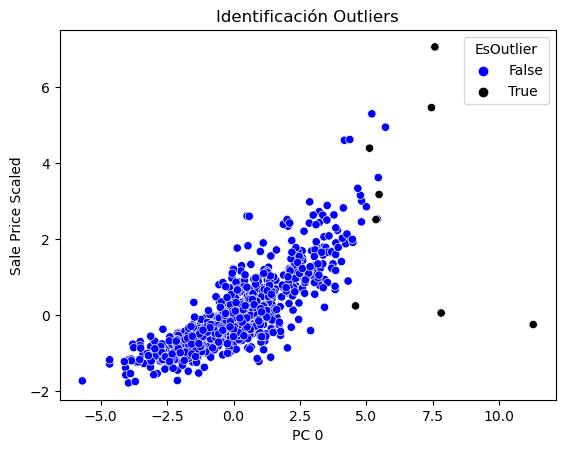

In [704]:
# Identifiquemoslos visualmente con PCA

plt.figure()
sns.scatterplot(data = df_train,
                x = 'PC_0',
                y = 'SalePrice_Scaled',
                hue = 'EsOutlier',               
                palette={0: 'blue', 1: 'black'})
plt.xlabel('PC 0')
plt.ylabel('Sale Price Scaled')
plt.title('Identificación Outliers')

# Detección de Outiliers: Minimum Covariance Determinant

In [705]:
from sklearn.covariance import EllipticEnvelope
import warnings
warnings.filterwarnings("ignore")
ee = EllipticEnvelope(contamination = 0.01)
yhat = ee.fit_predict(X_train)

# Marco Outlier en train
df_train['EsOutlier_2'] = yhat == (-1)

# En test: 
yhat_test = ee.predict(X_train)
df_train['EsOutlier_2'] = yhat_test == (-1)

Text(0.5, 1.0, 'Identificación Outliers')

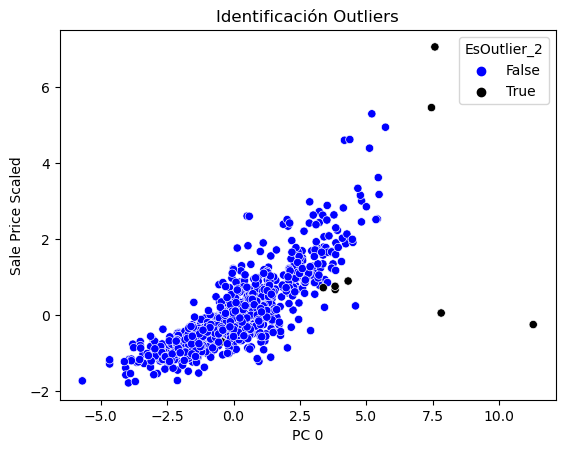

In [706]:
# Identifiquemoslos visualmente con PCA

plt.figure()
sns.scatterplot(data = df_train,
                x = 'PC_0',
                y = 'SalePrice_Scaled',
                hue = 'EsOutlier_2',               
                palette={0: 'blue', 1: 'black'})
plt.xlabel('PC 0')
plt.ylabel('Sale Price Scaled')
plt.title('Identificación Outliers')

# Detección de Outiliers: One-Class SVM

In [707]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(nu = 0.01,
                    kernel = 'rbf')

yhat = ocsvm.fit_predict(X_train)

# Marco Outlier en train
df_train['EsOutlier_3'] = yhat == (-1)

# En test: 
yhat_test = ocsvm.predict(X_train)
df_train['EsOutlier_3'] = yhat_test == (-1)

Text(0.5, 1.0, 'Identificación Outliers')

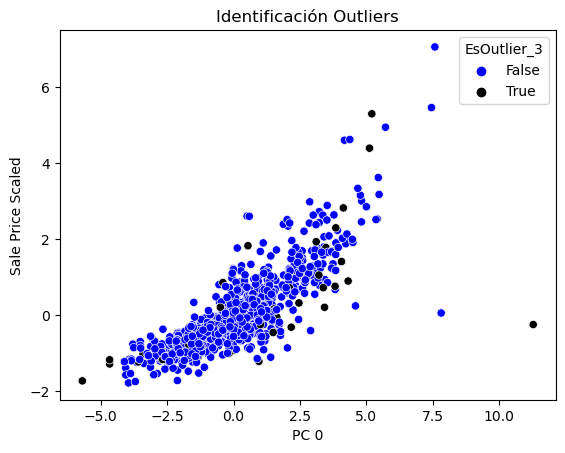

In [708]:
# Identifiquemoslos visualmente con PCA
plt.figure()
sns.scatterplot(data = df_train,
                x = 'PC_0',
                y = 'SalePrice_Scaled',
                hue = 'EsOutlier_3',               
                palette={0: 'blue', 1: 'black'})
plt.xlabel('PC 0')
plt.ylabel('Sale Price Scaled')
plt.title('Identificación Outliers')